# Study of the Indian Air Quality





## Initial Setup

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

In [4]:
!pip install pandas matplotlib seaborn --upgrade --quiet

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#sns.set_style('darkgrid')
#plt.rcParams['font.size'] = 14
#plt.rcParams['figure.figsize'] = (9, 5)
#plt.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
jovian.commit(project='air-quality-india-project',environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


In [6]:
jovian.commit(files=['city_day.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "zakera12m-hanif/air-quality-india-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/zakera12m-hanif/air-quality-india-project


'https://jovian.ml/zakera12m-hanif/air-quality-india-project'

## Loading and exploring the dataset


In [7]:
# Importing the raw dataset
raw_df=pd.read_csv('city_day.csv')

In [8]:
raw_df

City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
0       0.92  27.64  133.36     0.00     0.02    0.00   NaN           NaN  
1       0.97  24.55   34.06     3.68     5.50    3.77   NaN           NaN  
2      17.40  29.07   30.70     6.80    16.40    2.25   NaN           NaN  
3       1.70  18.59   36.08     4.43    10.14    1.00   NaN           NaN  
4      22.10  39.33   39.31     7.01    18.89    2.78   NaN           NaN  
...      ...    ...     ...      ...      ...     ...   ...           ...  
29526   0.47   8.55   23.30     2.24    12.07    0.73  41.0          Good  
29527   0.52  12.72   30.14     0.74     2.21    0.38  70.0  Satisfactory  
29528   0.48   8.42   30.96     0.01     0.01    0.00  68.0  Satisfactory  
29529   0.52   9.84   28.30     0.00     0.00    0.00  54.0  Satisfactory  
29530   0.59   2.10   17.05      NaN      NaN     NaN  50.0          Good  

[29531 rows x 16 columns]

In [52]:
city_day_df=raw_df.copy()

In [10]:
#Checking the number of columns in the df
city_day_df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [11]:
#Checking the datatype of each column
city_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [53]:
#Converting the dataset into a suitable format for analysis
city_day_df['Date']=pd.to_datetime(city_day_df['Date'])
city_day_df['year']=pd.DatetimeIndex(city_day_df.Date).year
city_day_df['month']=pd.DatetimeIndex(city_day_df.Date).month
city_day_df

City       Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad 2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad 2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad 2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad 2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad 2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...        ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam 2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam 2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam 2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam 2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam 2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  \
0       0.92  27.64  133.36     0.00     0.02    0.00   NaN           NaN   
1       0.97  24.55   34.06     3.68     5.50    3.77   NaN           NaN   
2      17.40  29.07   30.70     6.80    16.40    2.25   NaN           NaN   
3       1.70  18.59   36.08     4.43    10.14    1.00   NaN           NaN   
4      22.10  39.33   39.31     7.01    18.89    2.78   NaN           NaN   
...      ...    ...     ...      ...      ...     ...   ...           ...   
29526   0.47   8.55   23.30     2.24    12.07    0.73  41.0          Good   
29527   0.52  12.72   30.14     0.74     2.21    0.38  70.0  Satisfactory   
29528   0.48   8.42   30.96     0.01     0.01    0.00  68.0  Satisfactory   
29529   0.52   9.84   28.30     0.00     0.00    0.00  54.0  Satisfactory   
29530   0.59   2.10   17.05      NaN      NaN     NaN  50.0          Good   

       year  month  
0      2015      1  
1      2015      1  
2      2015      1  
3      2015      1  
4      2015      1  
...     ...    ...  
29526  2020      6  
29527  2020      6  
29528  2020      6  
29529  2020      6  
29530  2020      7  

[29531 rows x 18 columns]

In [13]:
#Checking the datatype of each column
city_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
 16  year        29531 non-

In [14]:
city_day_df.columns = city_day_df.columns.str.strip()

In [15]:
#The tuple returns the number of rows and columns of the modified df
city_day_df.shape

(29531, 18)

In [16]:
city_day_df.describe()

PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684275      6.962884     18.133775     21.694928     15.811136   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%        8.580000      0.510000      5.670000     18.860000      0.120000   
50%       15.850000      0.890000      9.160000     30.840000      1.070000   
75%       30.020000      1.450000     15.220000     45.570000      3.080000   
max      352.890000    175.810000    193.860000    257.730000    455.030000   

            Toluene        Xylene           AQI          year         month  
count  21490.000000  11422.000000  24850.000000  29531.000000  29531.000000  
mean       8.700972      3.070128    166.463581   2017.887914      6.267143  
std       19.969164      6.323247    140.696585      1.533783      3.431974  
min        0.000000      0.000000     13.000000   2015.000000      1.000000  
25%        0.600000      0.140000     81.000000   2017.000000      3.000000  
50%        2.970000      0.980000    118.000000   2018.000000      6.000000  
75%        9.150000      3.350000    208.000000   2019.000000      9.000000  
max      454.850000    170.370000   2049.000000   2020.000000     12.000000

## Exploratory Data Analysis

In [17]:
#The number of cities included in the dataset
city_day_df.City.nunique()

26

In [160]:
pollutants = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']

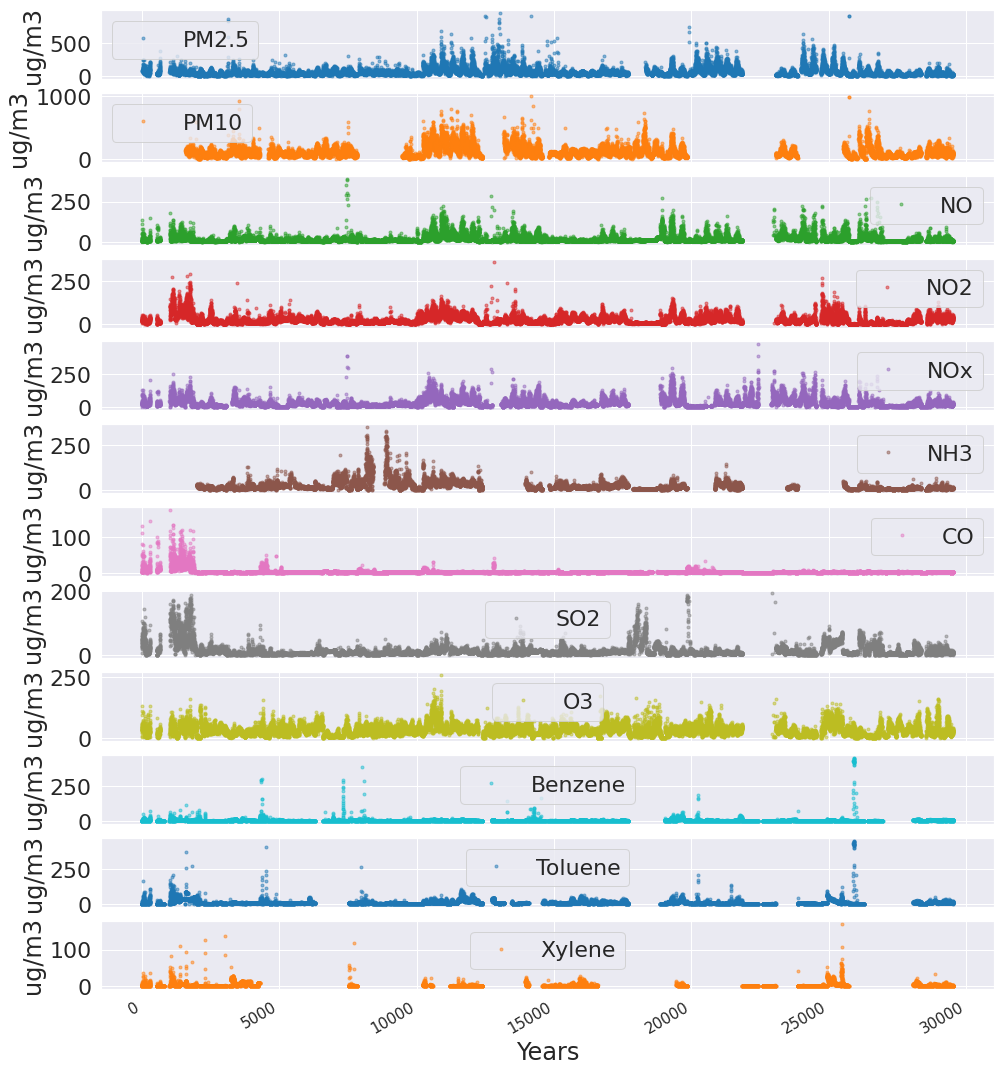

In [164]:
#Yearly analysis of pollutants level throughout India
city_day_df2=city_day_df.copy()
city_day_df2.set_index('Date',inplace=True)
axes=city_day_df[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes: 
    ax.set_xlabel('Years')
    ax.set_ylabel('ug/m3')

In [143]:
df_city_day=city_day_df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
 16  year        29531 non-

In [144]:
df_city_day  = df_city_day.fillna(df_city_day.mean())

df_Ahmedabad = df_city_day[df_city_day['City']== 'Ahmedabad']
df_Bengaluru = df_city_day[df_city_day['City']== 'Bengaluru']
df_Delhi     = df_city_day[df_city_day['City']== 'Delhi']
df_Hyderabad = df_city_day[df_city_day['City']== 'Hyderabad']
df_Kolkata   = df_city_day[df_city_day['City']== 'Kolkata']

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


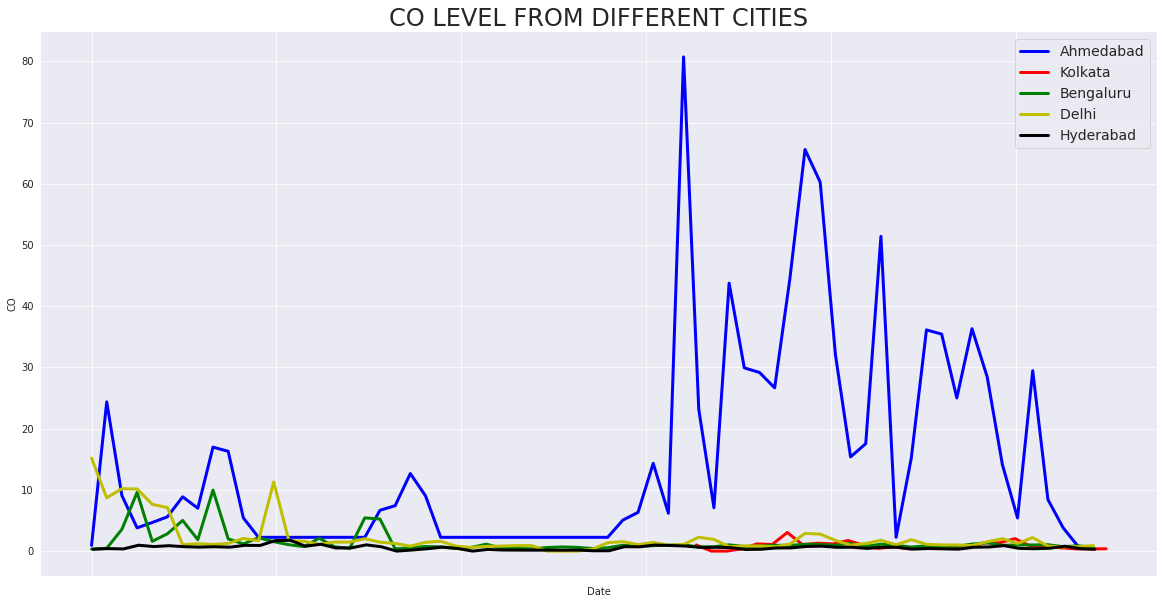

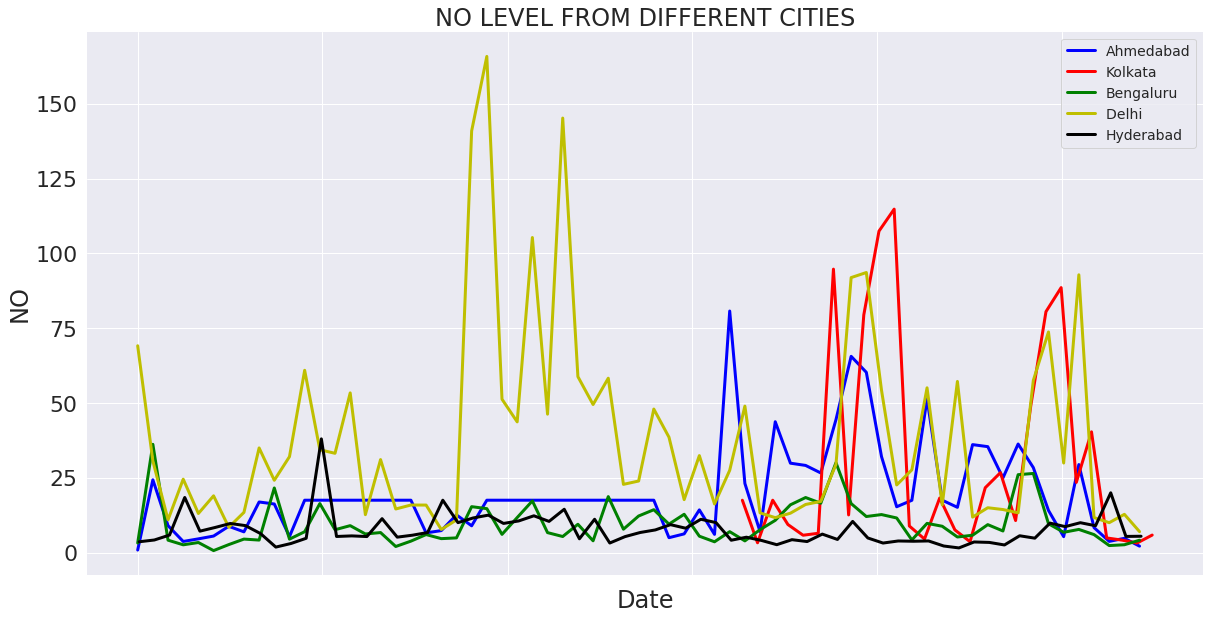

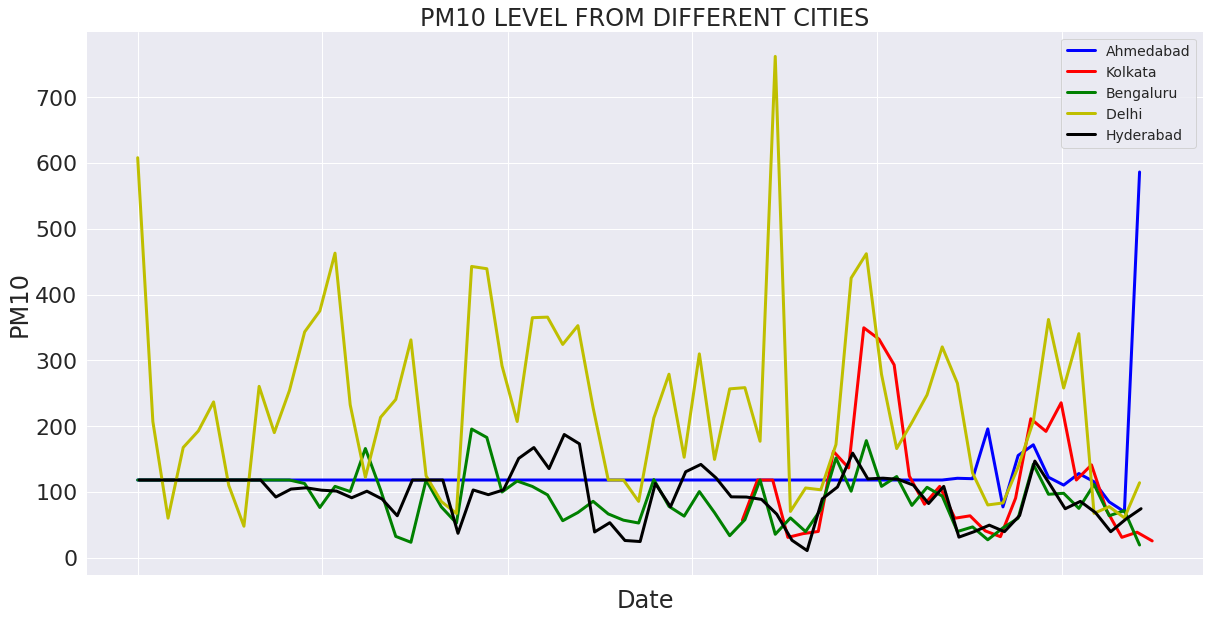

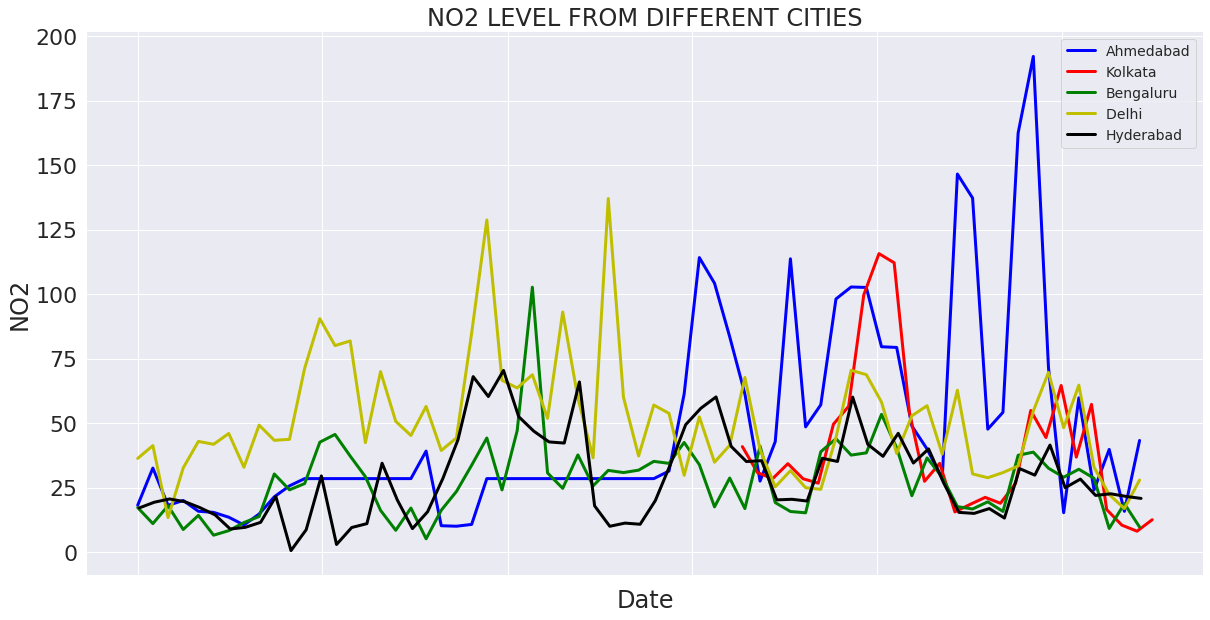

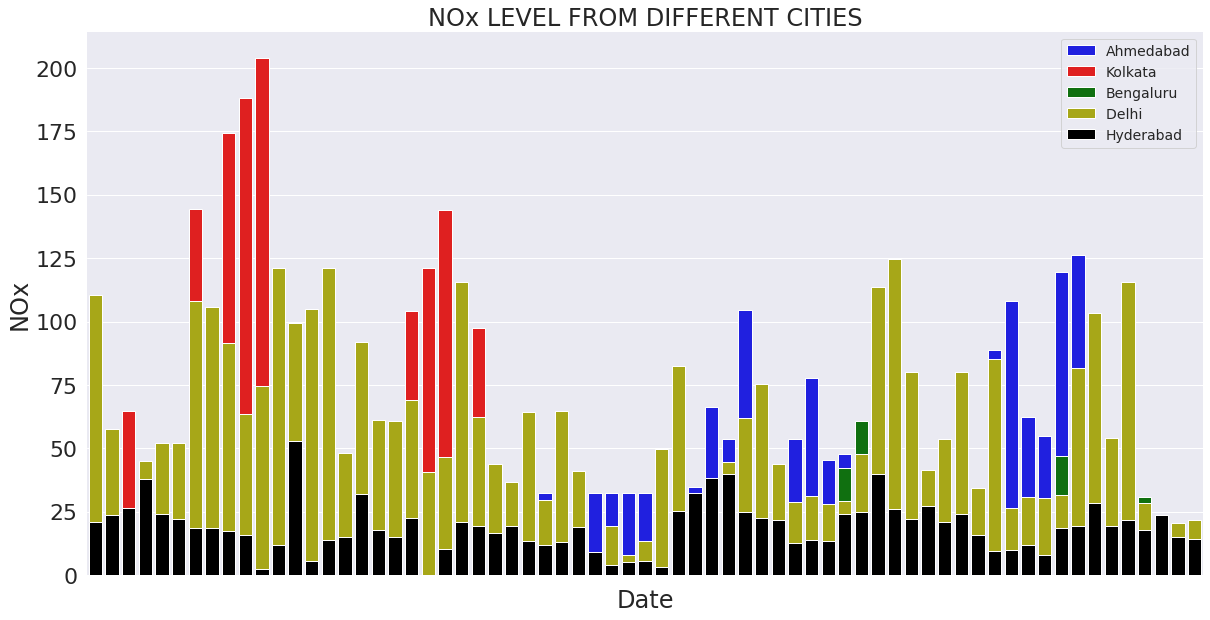

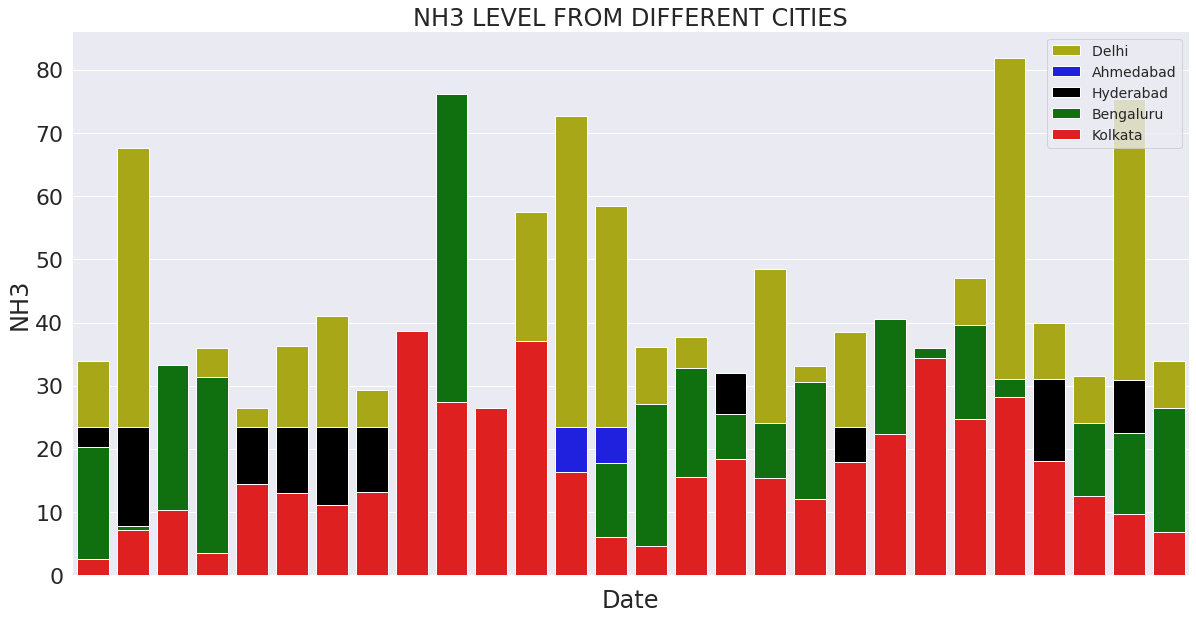

In [145]:
fig,ax = plt.subplots(figsize=(20, 10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3})

sns.lineplot(x="Date", y="CO", data=df_Ahmedabad.iloc[::30], color="b",label = 'Ahmedabad')
sns.lineplot(x="Date", y="CO", data=df_Kolkata.iloc  [::30], color="r",label = 'Kolkata')
sns.lineplot(x="Date", y="CO", data=df_Bengaluru.iloc[::30], color="g",label = 'Bengaluru')
sns.lineplot(x="Date", y="CO", data=df_Delhi    .iloc[::30], color="y",label = 'Delhi    ')
sns.lineplot(x="Date", y="CO", data=df_Hyderabad.iloc[::30], color="black",label = 'Hyderabad')

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'January 2015 to April 2020'
ax.set_xticklabels(ax.get_xticklabels(labels), rotation=30,ha="left")
plt.rcParams["xtick.labelsize"] = 15

ax.set_title('CO LEVEL FROM DIFFERENT CITIES')
ax.legend(fontsize = 14)

fig,ax = plt.subplots(figsize=(20, 10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3})

sns.lineplot(x="Date", y="NO", data=df_Ahmedabad.iloc[::30], color="b",label = 'Ahmedabad')
sns.lineplot(x="Date", y="NO", data=df_Kolkata.iloc  [::30], color="r",label = 'Kolkata')
sns.lineplot(x="Date", y="NO", data=df_Bengaluru.iloc[::30], color="g",label = 'Bengaluru')
sns.lineplot(x="Date", y="NO", data=df_Delhi    .iloc[::30], color="y",label = 'Delhi    ')
sns.lineplot(x="Date", y="NO", data=df_Hyderabad.iloc[::30], color="black",label = 'Hyderabad')

ax.set_xticklabels(ax.get_xticklabels(labels), rotation=30,ha="left")
plt.rcParams["xtick.labelsize"] = 15

ax.set_title('NO LEVEL FROM DIFFERENT CITIES')
ax.legend(fontsize = 14)

fig,ax = plt.subplots(figsize=(20, 10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3})

sns.lineplot(x="Date", y="PM10", data=df_Ahmedabad.iloc[::30], color="b",label = 'Ahmedabad')
sns.lineplot(x="Date", y="PM10", data=df_Kolkata.iloc  [::30], color="r",label = 'Kolkata')
sns.lineplot(x="Date", y="PM10", data=df_Bengaluru.iloc[::30], color="g",label = 'Bengaluru')
sns.lineplot(x="Date", y="PM10", data=df_Delhi    .iloc[::30], color="y",label = 'Delhi    ')
sns.lineplot(x="Date", y="PM10", data=df_Hyderabad.iloc[::30], color="black",label = 'Hyderabad')

ax.set_xticklabels(ax.get_xticklabels(labels), rotation=30,ha="left")
plt.rcParams["xtick.labelsize"] = 15

ax.set_title('PM10 LEVEL FROM DIFFERENT CITIES')
ax.legend(fontsize = 14)

fig,ax = plt.subplots(figsize=(20, 10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3})

sns.lineplot(x="Date", y="NO2", data=df_Ahmedabad.iloc[::30], color="b",label = 'Ahmedabad')
sns.lineplot(x="Date", y="NO2", data=df_Kolkata.iloc  [::30], color="r",label = 'Kolkata')
sns.lineplot(x="Date", y="NO2", data=df_Bengaluru.iloc[::30], color="g",label = 'Bengaluru')
sns.lineplot(x="Date", y="NO2", data=df_Delhi    .iloc[::30], color="y",label = 'Delhi    ')
sns.lineplot(x="Date", y="NO2", data=df_Hyderabad.iloc[::30], color="black",label = 'Hyderabad')

ax.set_xticklabels(ax.get_xticklabels(labels), rotation=30,ha="left")
plt.rcParams["xtick.labelsize"] = 15

ax.set_title('NO2 LEVEL FROM DIFFERENT CITIES')
ax.legend(fontsize = 14)

fig,ax = plt.subplots(figsize=(20, 10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 1})

sns.barplot(x="Date", y="NOx", data=df_Ahmedabad.iloc[::30], color="b",label = 'Ahmedabad')
sns.barplot(x="Date", y="NOx", data=df_Kolkata.iloc  [::30], color="r",label = 'Kolkata')
sns.barplot(x="Date", y="NOx", data=df_Bengaluru.iloc[::30], color="g",label = 'Bengaluru')
sns.barplot(x="Date", y="NOx", data=df_Delhi    .iloc[::30], color="y",label = 'Delhi    ')
sns.barplot(x="Date", y="NOx", data=df_Hyderabad.iloc[::30], color="black",label = 'Hyderabad')

ax.set_xticklabels(ax.get_xticklabels(labels), rotation=30,ha="left")
plt.rcParams["xtick.labelsize"] = 15

ax.set_title('NOx LEVEL FROM DIFFERENT CITIES')
ax.legend(fontsize = 14)

fig,ax = plt.subplots(figsize=(20, 10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 1})

sns.barplot(x="Date", y="NH3", data=df_Delhi    .iloc[::30], color="y",label = 'Delhi    ')
sns.barplot(x="Date", y="NH3", data=df_Ahmedabad.iloc[::30], color="b",label = 'Ahmedabad')
sns.barplot(x="Date", y="NH3", data=df_Hyderabad.iloc[::30], color="black",label = 'Hyderabad')
sns.barplot(x="Date", y="NH3", data=df_Bengaluru.iloc[::30], color="g",label = 'Bengaluru')
sns.barplot(x="Date", y="NH3", data=df_Kolkata.iloc  [::30], color="r",label = 'Kolkata')


ax.set_xticklabels(ax.get_xticklabels(labels), rotation=30,ha="left")
plt.rcParams["xtick.labelsize"] = 15

ax.set_title('NH3 LEVEL FROM DIFFERENT CITIES')
ax.legend(fontsize = 14);


In [158]:
df_comparison=city_day_df.cop()
df_ahmedabad = df_comparison[df_comparison['City'] == "Ahmedabad"]
df_ahmedabad[['PM2.5', 'PM10', 'NO2', 'NOx', 'CO', 'Xylene', 'AQI',"Year"]].style.background_gradient(cmap='Reds')

In [157]:
df_bengaluru = df_comparison[df_comparison['City'] == "Bengaluru"]
df_bengaluru[['PM2.5', 'PM10', 'NO2', 'NOx', 'CO', 'Xylene', 'AQI']].style.background_gradient(cmap='Reds')

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='year', ylabel='AQI'>

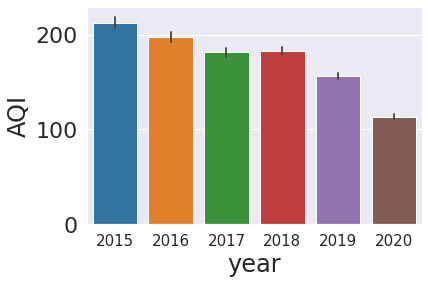

In [168]:
sns.barplot('year',AQI,data=city_day_df)

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


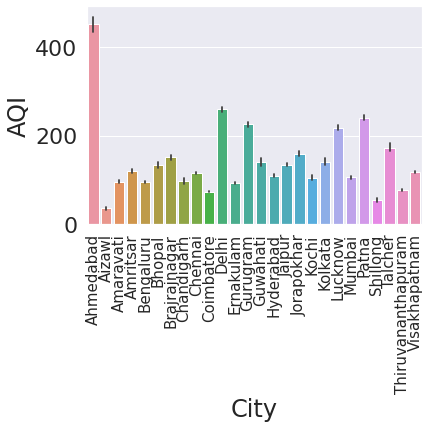

In [171]:
sns.barplot('City',AQI,data=city_day_df)
plt.xticks(rotation=90);

In [178]:
mumbai_yearly_df
#sns.barplot('Date',AQI,data=mumbai_yearly_df)
#plt.xticks(rotation=90);

PM2.5       PM10         NO        NO2        NOx        NH3  \
year                                                                     
2015        NaN        NaN        NaN        NaN  55.769699        NaN   
2016        NaN        NaN        NaN        NaN  40.069263        NaN   
2017        NaN        NaN        NaN        NaN  58.296047        NaN   
2018  34.829788  99.848791  36.221071  31.327606  68.862222        NaN   
2019  34.736849  95.925288  31.810417  23.591861  54.973944  14.064717   
2020  36.594317  94.733661  23.074153  22.698852  44.860000  13.575956   

            CO        SO2         O3   Benzene   Toluene    Xylene  \
year                                                                 
2015  0.000000        NaN        NaN  0.000000  0.000000  0.000000   
2016  0.000000        NaN        NaN  0.000000  0.000000  0.000000   
2017  0.000000  98.740000  17.240000  0.002086  0.005571  0.004971   
2018  1.572343  19.257197  43.479476  0.767771  0.102807  0.056053   
2019  1.270907  14.177370  28.868548  2.556630       NaN       NaN   
2020  0.626776  11.017213  27.381475  4.228251       NaN       NaN   

             AQI     month  
year                        
2015         NaN  6.526027  
2016         NaN  6.513661  
2017         NaN  6.526027  
2018  102.612335  6.526027  
2019  107.950685  6.526027  
2020  103.568306  3.519126

In [136]:
#Selecting only the data for Mumbai 
mumbai_df=city_day_df[city_day_df.City=='Mumbai']
mumbai_df

City       Date  PM2.5   PM10     NO   NO2    NOx    NH3    CO  \
21855  Mumbai 2015-01-01    NaN    NaN    NaN   NaN  27.38    NaN  0.00   
21856  Mumbai 2015-01-02    NaN    NaN    NaN   NaN  26.20    NaN  0.00   
21857  Mumbai 2015-01-03    NaN    NaN    NaN   NaN  26.04    NaN  0.00   
21858  Mumbai 2015-01-04    NaN    NaN    NaN   NaN  25.97    NaN  0.00   
21859  Mumbai 2015-01-05    NaN    NaN    NaN   NaN  25.18    NaN  0.00   
...       ...        ...    ...    ...    ...   ...    ...    ...   ...   
23859  Mumbai 2020-06-27  18.04  63.72  28.29  8.58  36.07  26.69  0.43   
23860  Mumbai 2020-06-28  12.33  44.84  27.15  8.06  34.78  26.50  0.38   
23861  Mumbai 2020-06-29   7.88  27.51  26.58  7.94  34.42  23.94  0.38   
23862  Mumbai 2020-06-30   4.66  13.87  25.25  8.02  33.25  19.89  0.36   
23863  Mumbai 2020-07-01   3.84  11.28  27.64  5.57  33.21  23.60  0.37   

         SO2    O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  year  month  
21855    NaN   NaN     0.00      0.0     0.0   NaN           NaN  2015      1  
21856    NaN   NaN     0.00      0.0     0.0   NaN           NaN  2015      1  
21857    NaN   NaN     0.00      0.0     0.0   NaN           NaN  2015      1  
21858    NaN   NaN     0.00      0.0     0.0   NaN           NaN  2015      1  
21859    NaN   NaN     0.00      0.0     0.0   NaN           NaN  2015      1  
...      ...   ...      ...      ...     ...   ...           ...   ...    ...  
23859  10.36  5.68     0.82      NaN     NaN  64.0  Satisfactory  2020      6  
23860  10.58  5.76     0.85      NaN     NaN  64.0  Satisfactory  2020      6  
23861  11.11  5.84     0.47      NaN     NaN  54.0  Satisfactory  2020      6  
23862  13.40  6.94     0.73      NaN     NaN  54.0  Satisfactory  2020      6  
23863  13.18  6.68     0.78      NaN     NaN  53.0  Satisfactory  2020      7  

[2009 rows x 18 columns]

In [135]:
mumbai_yearly_df2=mumbai_df.groupby('year').mean()
mumbai_yearly_df2.columns = mumbai_yearly_df.columns.str.strip()
mumbai_yearly_df

PM2.5       PM10         NO        NO2        NOx        NH3  \
year                                                                     
2015        NaN        NaN        NaN        NaN  55.769699        NaN   
2016        NaN        NaN        NaN        NaN  40.069263        NaN   
2017        NaN        NaN        NaN        NaN  58.296047        NaN   
2018  34.829788  99.848791  36.221071  31.327606  68.862222        NaN   
2019  34.736849  95.925288  31.810417  23.591861  54.973944  14.064717   
2020  36.594317  94.733661  23.074153  22.698852  44.860000  13.575956   

            CO        SO2         O3   Benzene   Toluene    Xylene  \
year                                                                 
2015  0.000000        NaN        NaN  0.000000  0.000000  0.000000   
2016  0.000000        NaN        NaN  0.000000  0.000000  0.000000   
2017  0.000000  98.740000  17.240000  0.002086  0.005571  0.004971   
2018  1.572343  19.257197  43.479476  0.767771  0.102807  0.056053   
2019  1.270907  14.177370  28.868548  2.556630       NaN       NaN   
2020  0.626776  11.017213  27.381475  4.228251       NaN       NaN   

             AQI     month  
year                        
2015         NaN  6.526027  
2016         NaN  6.513661  
2017         NaN  6.526027  
2018  102.612335  6.526027  
2019  107.950685  6.526027  
2020  103.568306  3.519126

In [129]:
mumbai_yearly_df.describe()

PM2.5       PM10         NO        NO2        NOx        NH3  \
count   3.000000   3.000000   3.000000   3.000000   6.000000   2.000000   
mean   35.386985  96.835913  30.368547  25.872773  53.805196  13.820337   
std     1.046612   2.676391   6.691009   4.745078  10.205875   0.345606   
min    34.736849  94.733661  23.074153  22.698852  40.069263  13.575956   
25%    34.783319  95.329474  27.442285  23.145357  47.388486  13.698146   
50%    34.829788  95.925288  31.810417  23.591861  55.371822  13.820337   
75%    35.712053  97.887039  34.015744  27.459733  57.664460  13.942527   
max    36.594317  99.848791  36.221071  31.327606  68.862222  14.064717   

             CO        SO2         O3   Benzene   Toluene    Xylene  \
count  6.000000   4.000000   4.000000  6.000000  4.000000  4.000000   
mean   0.578338  35.797945  29.242375  1.259123  0.027095  0.015256   
std    0.703345  42.098427  10.806707  1.760204  0.050543  0.027299   
min    0.000000  11.017213  17.240000  0.000000  0.000000  0.000000   
25%    0.000000  13.387331  24.846107  0.000521  0.000000  0.000000   
50%    0.313388  16.717283  28.125012  0.384929  0.002786  0.002486   
75%    1.109874  39.127897  32.521280  2.109415  0.029880  0.017742   
max    1.572343  98.740000  43.479476  4.228251  0.102807  0.056053   

              AQI     month  
count    3.000000  6.000000  
mean   104.710442  6.022816  
std      2.846551  1.226563  
min    102.612335  3.519126  
25%    103.090320  6.516753  
50%    103.568306  6.526027  
75%    105.759495  6.526027  
max    107.950685  6.526027

In [50]:
city_day_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29531 entries, 2015-01-01 to 2020-07-01
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   PM2.5       24933 non-null  float64
 2   PM10        18391 non-null  float64
 3   NO          25949 non-null  float64
 4   NO2         25946 non-null  float64
 5   NOx         25346 non-null  float64
 6   NH3         19203 non-null  float64
 7   CO          27472 non-null  float64
 8   SO2         25677 non-null  float64
 9   O3          25509 non-null  float64
 10  Benzene     23908 non-null  float64
 11  Toluene     21490 non-null  float64
 12  Xylene      11422 non-null  float64
 13  AQI         24850 non-null  float64
 14  AQI_Bucket  24850 non-null  object 
 15  year        29531 non-null  int64  
 16  month       29531 non-null  int64  
dtypes: float64(13), int64(2), object(2)
memory usage: 4.1+ MB


In [48]:
]

KeyError: 'Date'

In [ ]:
#Detecting the missing values in the dataset
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
missing_values_table(df)


In [ ]:
#Drop rows which contains any NaN or missing value for Age column
df.dropna(subset=['PM2.5', 'PM10', 'NO', 'NO2','NOx','NH3','CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],how='any',inplace=True)
df[['PM2.5', 'PM10', 'NO', 'NO2','NOx','NH3','CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']].isnull().sum()
df

In [ ]:
#Graph showing pollutants level in May from 2015 to 2020

In [ ]:
######################################################################################

In [ ]:
rcities=['Patna', 'Gurugram','Amritsar','Jorapokhar','Thiruvananthapuram','Amaravati','Brajrajnagar','Talcher','Shillong','Bhopal','Ernakulam','Kochi','Aizawl','Visakhapatnam']
city_day_df=city_day_df.set_index('City')
for city in rcities:
    city_day_df=city_day_df.drop(city,axis=0)
city_day_df

In [ ]:
# Amount of Particulate Matter (PM2.5) on a yearly basis

In [ ]:
#we can show all the pollutants level using subplots
pollutants = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']

In [ ]:
city_day_df.set_index('Date',inplace=True)
axes=city_day_df[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
plt.title('Pollutants level ')
for ax in axes: 
    ax.set_xlabel('Years')
    ax.set_ylabel('ug/m3')

In [ ]:
fig=plt.plot(city_day_df)
fig.show()

In [ ]:
jovian.commit(project='air-quality-india-project',environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
